# Solving non-linear equations

Given a function
$$
f: \mathbf{R} \to \mathbf{R}
$$
find the roots of an equation
$$
f(x) = 0\;.
$$


In [2]:
import numpy as np

%matplotlib notebook

import matplotlib.pyplot as plt
plt.xkcd()

In [3]:
def f(x):
    return x**3 - 3*x**2 + 5

<IPython.core.display.Javascript object>


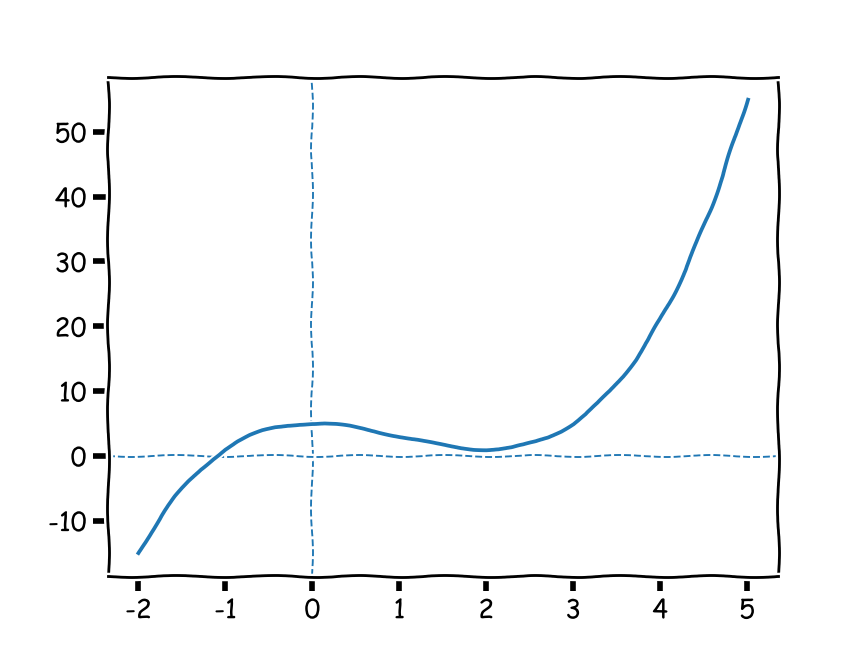

In [4]:
xx = np.linspace(-2, 5)
fig, ax = plt.subplots()
ax.axvline(0, ls='--', lw=1); plt.axhline(0, ls='--', lw=1)
ax.plot(xx, f(xx))

Let us consider only real roots.

### Step 1. Roots' isolation

<IPython.core.display.Javascript object>


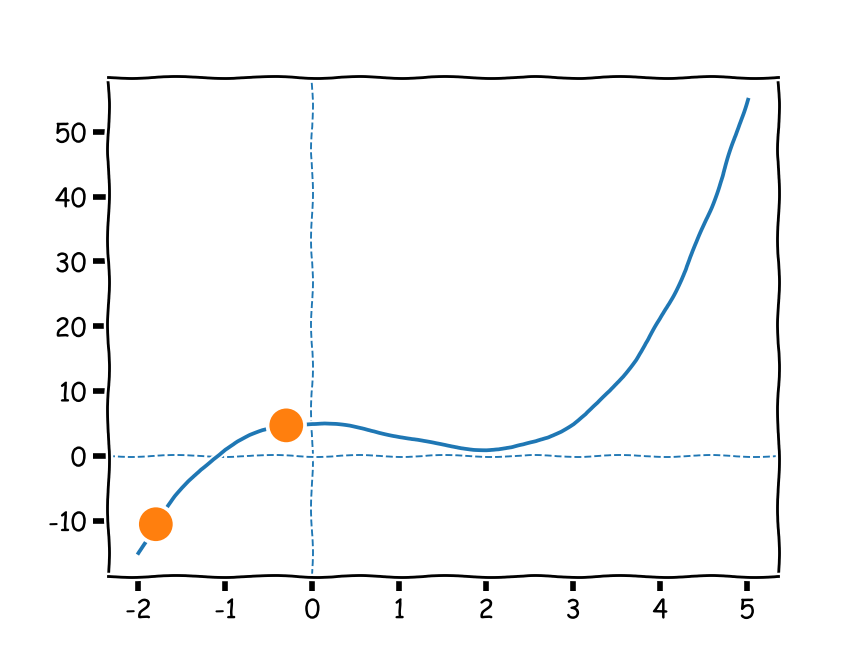

In [5]:
plt.axvline(0, ls='--', lw=1); plt.axhline(0, ls='--', lw=1)
plt.plot(xx, f(xx))
plt.plot([-1.8, -0.3], [f(-1.8), f(-0.3)], 'o', ms=18, mec='none')

$$
f(x) = x^3 - 3 x^2 + 4
$$

<IPython.core.display.Javascript object>


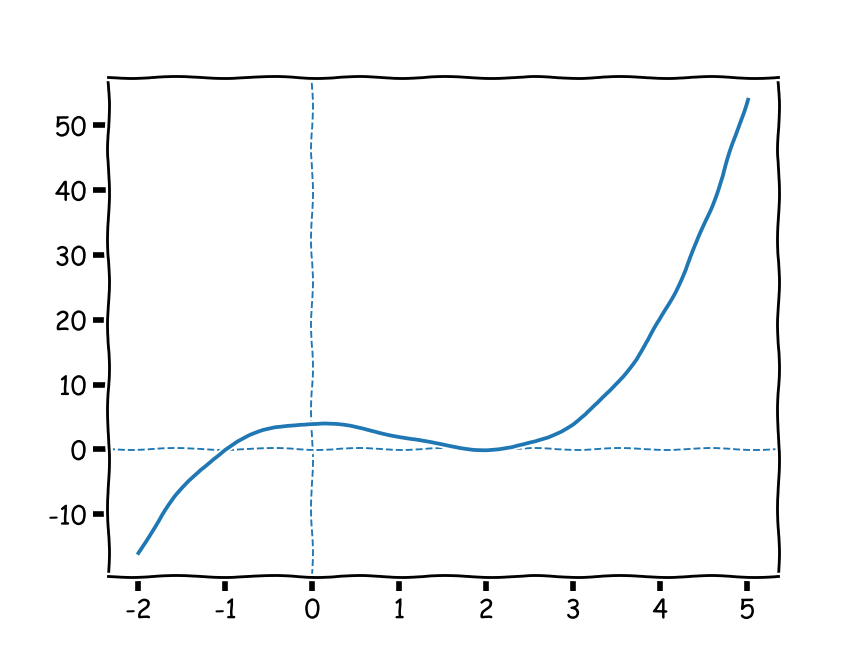

In [6]:
plt.axvline(0, ls='--', lw=1); plt.axhline(0, ls='--', lw=1)
plt.plot(xx, (lambda x: x**3 - 3*x**2 + 4)(xx))

## Bisection (dichotomy) method

Suggest we've already isolated a root on interval $[a, b]$.

Let's consider intervals $[a, x_0]$ and $[x_0, b]$, where $x_0 = (a + b) / 2$. Chose the interval which contains the root. 

Stopping criterion: $| x_m - x_{m-1} | \leq \varepsilon$.


$\color{red}{+}$ the convergence is garanteed: *the root remains isolated on each step*

$\color{red}{-}$ the sequence of $\{ x_m \}$ converges linearly to the root: $\delta_{m+1} = \delta_{m} / 2$

## Secant method, regula falsi, Ridders' method etc.

$\color{red}{+}$ converge superlinearly

$\color{red}{-}$ do not keep the root isolated $\Longrightarrow$ the convergence is not garanteed

## Newton–Raphson method

Let $x_*$ be the unknown root of the function $f(x)$. Suggest we know $x_0$ such that $\delta = x_* - x_0 \ll 1$.

Then $$
0 \approx f(x_0 + \delta) = f(x_0) + f'(x_0)\, \delta + f''(x_0) \frac{\delta^2}{2} + \cdots\;,
$$
and the iterative sequence
$$
x_{j+1} = x_j - \frac{f(x_j)}{f'(x_j)}
$$

converges to $x_*$.

In [8]:
def fprime(x):
    return 3 * x * (x - 2)

<IPython.core.display.Javascript object>


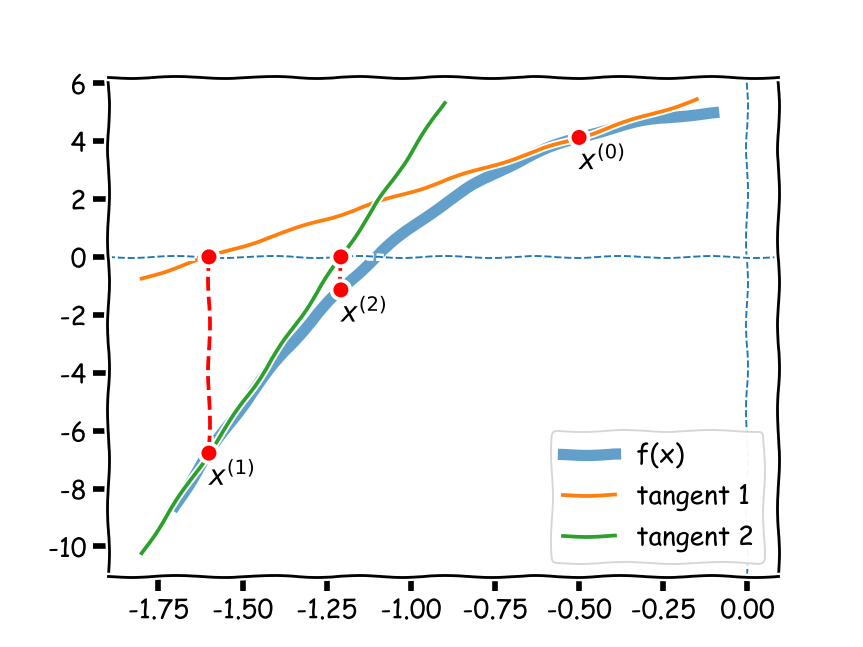

In [9]:
x = np.linspace(-1.7, -0.1)

x0 = -0.5   # initial guess

plt.plot(x, f(x), lw=6, label='f(x)', alpha=0.7)

# plot the tangent line
xx = np.asarray([-1.8, -0.15])
plt.plot(xx, fprime(x0)*(xx - x0) + f(x0), '-', label='tangent 1')

# initial point
plt.plot([x0], [f(x0)], 'ro', ms=8, mec='none')
plt.annotate(r'$x^{(0)}$',
             xy=(x0, f(x0)),
             xytext=(x0, f(x0)-1.1),
             fontsize=15,
             ) #arrowprops=dict(facecolor='C1', shrink=0.5))

# tangent crossing the curve & the zero
xc = -f(x0)/fprime(x0) + x0
plt.plot([xc, xc], [0, f(xc)], 'ro--', ms=8, mec='none', zorder=101)

plt.annotate(r'$x^{(1)}$',
             xy=(xc, f(xc)),
             xytext=(xc, f(xc)-1.1),
             fontsize=15,
             )

plt.legend(loc='lower right')
plt.axvline(0, ls='--', lw=1); plt.axhline(0, ls='--', lw=1)
plt.xlim([-1.9, 0.09])
plt.ylim([-11.01, 6.22])
plt.savefig('newton_1.jpg')


# 2nd tangent
xx1 = np.array([-1.8, -0.9])
plt.plot(xx1, fprime(xc)*(xx1 - xc) + f(xc), '-', label='tangent 2')

# 2nd tangent crossing the curve & the zero
xcc = -f(xc)/fprime(xc) + xc
plt.plot([xcc, xcc], [0, f(xcc)], 'ro--', ms=8, mec='none', zorder=101)

plt.annotate(r'$x^{(2)}$',
             xy=(xcc, f(xcc)),
             xytext=(xcc, f(xcc)-1.1),
             fontsize=15,
             )

plt.legend(loc='lower right')
plt.axvline(0, ls='--', lw=1); plt.axhline(0, ls='--', lw=1)

plt.xlim([-1.9, 0.09])
plt.ylim([-11.01, 6.22])
plt.savefig('newton_2.jpg')


If the Newton-Raphson iterative process converges, it has quadratic convergence:$$ \epsilon_{j+1} \propto \epsilon_j^2 .$$


(We can prove it by asuming that on step №$(j+1)$ we have $$\epsilon_{j+1} = \epsilon_j - \frac{f(x_j)}{f'(x_j)}\;.$$
We can use Taylor series to get $f(x_j)$ и $f'(x_j)$ representations as polynomials of $\epsilon$ near $x_0$.)

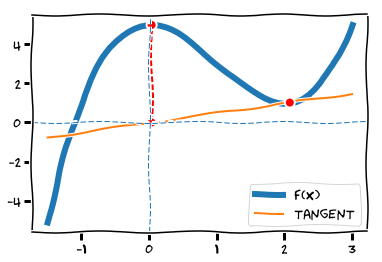

In [11]:
x = np.linspace(-1.5, 3)

x0 = 2.08   # initial guess

plt.plot(x, f(x), lw=6, label='f(x)')

# plot the tangent line
xx = np.asarray([-1.5, 3])
plt.plot(xx, fprime(x0)*(xx - x0) + f(x0), '-', label='tangent')

# initial point
plt.plot([x0], [f(x0)], 'ro', ms=8, mec='none')

# tangent crossing the curve & the zero
xc = -f(x0)/fprime(x0) + x0
plt.plot([xc], [0], 'ro', ms=11, mec='none')

plt.plot([xc, xc], [0, f(xc)], 'ro--', ms=8, mec='none')

plt.legend(loc='lower right')
plt.axvline(0, ls='--', lw=1); plt.axhline(0, ls='--', lw=1)

Newton-Raphson iterative process is unstable.

It can be applied a couple times to the solution calculated earlier using another method in order to improve the accuracy.

## Brent's method

A hybrid method. It combines inverse qudratic interpolation with the bisection method's steps.

See **Numerical Recipes**.

In [7]:
from scipy.optimize import brentq
xp = brentq(f, -1.8, -0.3)

print(xp, f(xp))

-1.1038034027355366 0.0


## Roots of polynomials

* We know the number of roots Мы знаем число корней (including complex).

* Polynomials of high degrees are numerically unstable.

* The Newton-Raphson method etc. are not recommended for finding the roots of polynomials.

### Companion matrix method


$$
\mathbf{A} = 
\begin{bmatrix}
-a_{n-1} & -a_{n-2} & \dots & -a_1 & -a_0 \\
1        &    0     & \dots & 0   & 0 \\
0        &    1     & \dots & 0   & 0 \\
&        &           \ddots &&    &   \\
0       &     0     & \dots & 1   & 0 
\end{bmatrix}
$$

It can be shown that
$$
\det(\mathbf{A} - x \mathbf{I}) = x^n + a_{n-1} x^{n-1} + \cdots + a_1 x + a_0
$$

For example,
$$
x^2 + 1 = 0
$$

In [3]:
A = np.array([[0, -1],
              [1, 0]])

from numpy.linalg import eig
e, v = eig(A)
e

array([0.+1.j, 0.-1.j])

In [4]:
# also check the condition number
from numpy.linalg import cond
cond(A)

1.0

C/C++/Fortran/... : use LAPACK, *geev

## Solving nonlinear systems

The problem

\begin{gather}
\mathbf{f} : \mathbf{R}^n \to \mathbf{R}^n \\
\mathbf{f}(\mathbf{x}) = \mathbf{0}
\end{gather}

is equivalent to the problem of global minima search for function $F(\mathbf{x})$

$$
F(\mathbf{x}) = \sum_{j=1}^n f_j(\mathbf{x})^2 \;.
$$


